In [1]:
from bertopic import BERTopic

/Users/wild/.pyenv/versions/3.11.2/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/wild/.pyenv/versions/3.11.2/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/wild/.pyenv/versions/3.11.2/lib/python3.11/site-packages/umap/d

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

In [4]:
import plotly.graph_objects as go

In [5]:
import hdbscan
import umap

In [6]:
from sentence_transformers import SentenceTransformer

In [8]:
df = pd.read_csv('ME_abstract_list.csv')

In [9]:
df

,Year,Author,Title,Abstract,Header,GPT,ada_embedding,Cluster,Topic,Topic_summary,Topic2,Topic_summary2,HDBSCAN_label,BERT_topic
0,2022,"Altermark, Niklas",Austerity and identity formation: How welfare ...,"In recent years, Swedish sick insurance has be...",Austerity and identity formation: How welfare ...,Workfare politics,[-0.01264846 -0.00565745 0.02498394 ... 0.00...,8,0,NaN,0,NaN,-1,0
1,2020,"Keating, Julie A",Characterising the gut microbiome in veterans ...,Approximately 25%-35% of the 1991 Gulf War Vet...,Characterising the gut microbiome in veterans ...,Gulf War Illness (GWI),[-0.01322902 -0.00577846 0.01161065 ... -0.01...,5,13,NaN,2,Role of Viral Infection,-1,10
2,2022,"Cacciani, Nicola",A prospective clinical study on the mechanisms...,Critical illness myopathy (CIM) is a consequen...,A prospective clinical study on the mechanisms...,Myopathy,[-0.02214065 -0.02211386 0.0176268 ... -0.00...,8,1,Covid and ME,0,NaN,-1,4
3,2020,"Naviaux, Robert K",Metabolic features of Gulf War illness.,"More than 230,000 veterans-about 1/3 of US per...",Metabolic features of Gulf War illness.:More t...,GWI,[ 0.00058872 0.00236791 0.01820069 ... -0.02...,5,13,NaN,3,Exercise and PEM,-1,10
4,2020,"Abou-Donia, Mohamed B",Using Plasma Autoantibodies of Central Nervous...,"For the past 30 years, there has been a lack o...",Using Plasma Autoantibodies of Central Nervous...,Gulf War Illness,[-0.03512404 0.01560609 0.00373968 ... -0.02...,5,13,NaN,2,Role of Viral Infection,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,2020,"Lien, Katarina",Abnormal blood lactate accumulation during rep...,Post-exertional malaise and delayed recovery a...,Abnormal blood lactate accumulation during rep...,"Post-exertional malaise, delayed recovery, oxy...",[-0.02465403 -0.01056507 0.01064397 ... 0.00...,3,3,"Exercise, Post-Exertional Malaise",3,Exercise and PEM,5,2
770,2021,"Keller, Betsy A",Inability of myalgic encephalomyelitis/chronic...,Myalgic Encephalomyelitis/Chronic Fatigue Synd...,Inability of myalgic encephalomyelitis/chronic...,Cardiopulmonary Exercise Test (CPET).,[-0.03732111 -0.00808045 -0.00393329 ... 0.00...,3,3,"Exercise, Post-Exertional Malaise",3,Exercise and PEM,5,2
771,2021,"Arroll, Megan A",Pilot study investigating the utility of a spe...,Myalgic encephalomyelitis/chronic fatigue synd...,Pilot study investigating the utility of a spe...,Pilot Study,[-0.01712239 -0.00193536 0.01533743 ... 0.00...,4,6,Primary Care Guidelines,6,Treatments,-1,0
772,2022,"Jason, Leonard A",Test-Retest Reliability of the DePaul Symptom ...,The DePaul Symptom Questionnaire (DSQ) was dev...,Test-Retest Reliability of the DePaul Symptom ...,Myalgic Encephalomyelitis/Chronic Fatigue Synd...,[-0.0093733 0.00909488 0.01422567 ... -0.00...,4,9,NaN,9,Diagnosis,-1,0


### NMF Model

In [9]:
tfid = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')

In [10]:
dtm = tfid.fit_transform(df['Header'])

In [11]:
nmf_model = NMF(n_components=18, random_state=42, max_iter=1000)

In [12]:
nmf_model.fit(dtm)

NMF(max_iter=1000, n_components=18, random_state=42)

In [13]:
for index, topic in enumerate(nmf_model.components_):
    print(f"Topic words for {index}")
    print([tfid.get_feature_names_out()[i] for i in topic.argsort()[-7:]])
    print("\n")

Topic words for 0
['illness', 'diagnosis', 'health', 'medical', 'care', 'disease', 'research']


Topic words for 1
['acute', 'cov', 'sars', 'post', '19', 'long', 'covid']


Topic words for 2
['disease', 'levels', 'endothelial', 'plasma', 'healthy', 'controls', 'patients']


Topic words for 3
['peak', 'patients', 'testing', 'cardiopulmonary', 'day', 'cpet', 'exercise']


Topic words for 4
['increased', 'immune', 'stress', 'inflammatory', 'ns', 'pathways', 'oxidative']


Topic words for 5
['intolerance', 'blood', 'cerebral', 'flow', 'oi', 'tilt', 'orthostatic']


Topic words for 6
['recovery', 'treatment', 'exercise', 'trial', 'graded', 'cbt', 'therapy']


Topic words for 7
['cytotoxicity', 'natural', 'killer', 'cells', 'trpm3', 'cell', 'nk']


Topic words for 8
['study', 'physical', 'activity', 'related', 'health', 'quality', 'life']


Topic words for 9
['diagnostic', 'canadian', 'definitions', 'consensus', 'definition', 'case', 'criteria']


Topic words for 10
['sex', 'bacterial', 'mic

In [14]:
topic_results = nmf_model.transform(dtm)

In [15]:
df['Topic'] = topic_results.argmax(axis=1)

In [23]:
pubmed_data_results = df

In [24]:
pubmed_data_results['NMF_topic'] = topic_results.argmax(axis=1)

In [33]:
pubmed_data_results['NMF_xcoords'] = result_NMF.x

In [34]:
pubmed_data_results['NMF_ycoords'] = result_NMF.y

In [16]:
# Prepare data for graphing
umap_data_NMF = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(dtm)
result_NMF = pd.DataFrame(umap_data_NMF, columns=['x', 'y'])
result_NMF['labels'] = topic_results.argmax(axis=1)

In [18]:
result_NMF.labels.max()

17

In [19]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return [mpl.colors.to_hex((1-m)*c1 + m*c2) for m in mix]

c1 = '#4AACE1'
c2 = '#022C43'

mix_pcts = [x/(18) for x in range(18)]

color = colorFader(c1, c2, mix_pcts)

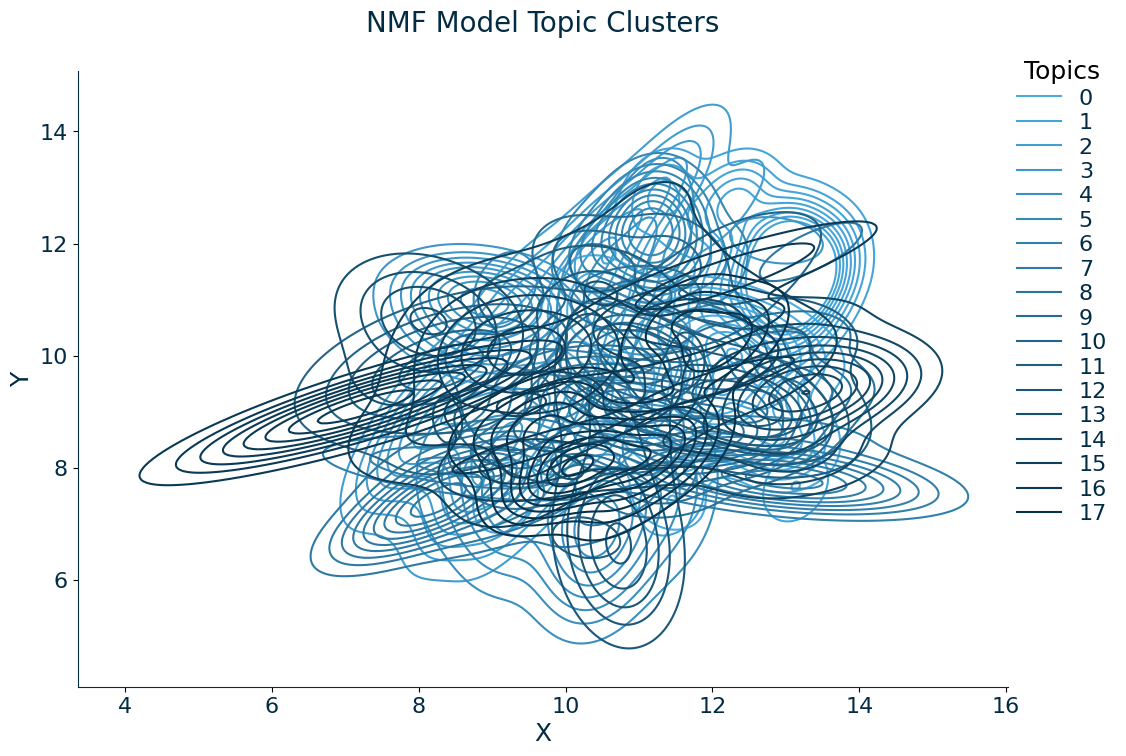

In [20]:
figure, ax = plt.subplots(figsize=(12,8))
ax = sns.kdeplot(x=result_NMF.x, y=result_NMF.y, hue=result_NMF.labels, palette=color)
plt.xlabel('X', size=18, color=c2)
plt.ylabel('Y', size=18, color=c2)
plt.xticks(size=16, color=c2)
plt.yticks(size=16, color=c2)
plt.title('NMF Model Topic Clusters', size=20, color=c2, y=1.05)
sns.move_legend(obj=ax, loc=(1,0.25), frameon=False, title='Topics', prop={'size':16}, title_fontproperties={'size':18}, labelspacing=0.2, labelcolor=c2)
sns.despine()
ax.spines['left'].set_color('#022c43')
ax.spines['bottom'].set_color('#022c43')
figure.set_alpha(0)
ax.set_facecolor('#fff')
plt.savefig('NMF_topic_clusters.png', format='png', dpi=300);

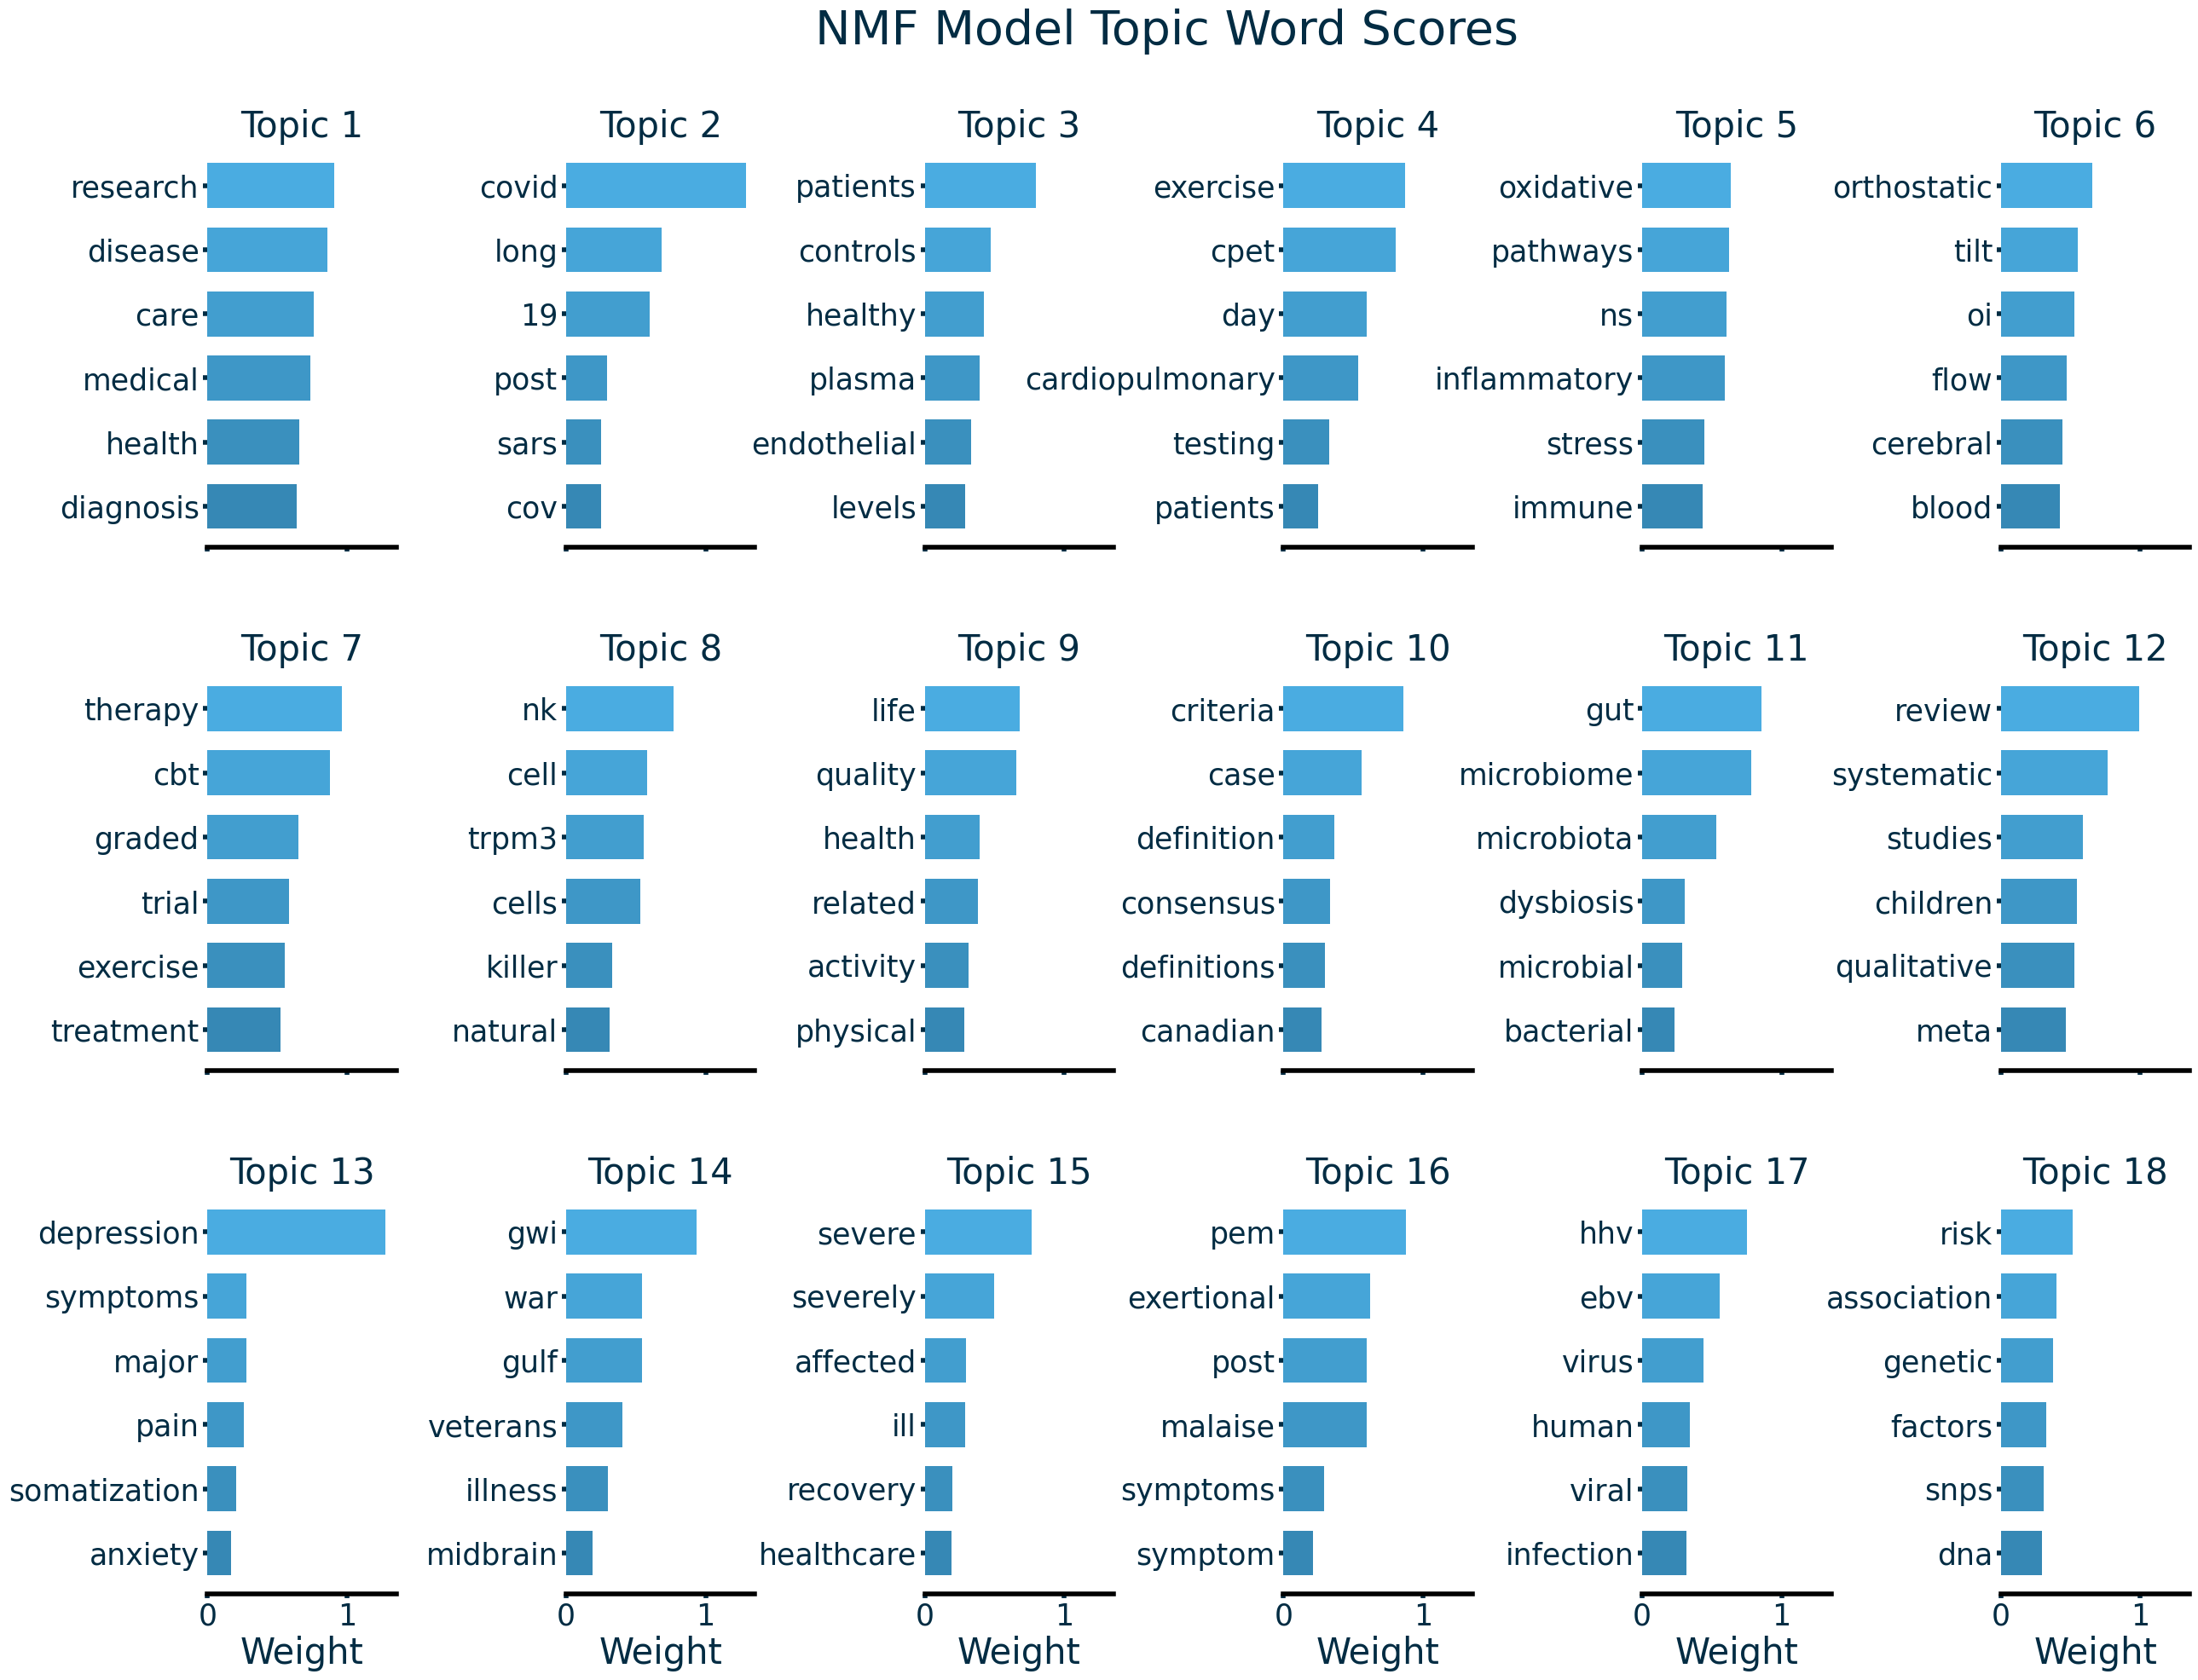

In [30]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(3, 6, figsize=(30, 20), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color=color)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30}, color=c2)
        ax.invert_yaxis()
        if topic_idx > 11: ax.set_xlabel('Weight', fontsize=30, color=c2)
        ax.tick_params(axis="both", which="major", labelsize=25, colors=c2, width=4)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        ax.spines['bottom'].set_linewidth(4)
        fig.suptitle(title, fontsize=40, color=c2)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.savefig('Topics_in_NMF.png', format='png', dpi=300)

tfidf_feature_names = tfid.get_feature_names_out()
plot_top_words(
    nmf_model, tfidf_feature_names, 6, "NMF Model Topic Word Scores"
)

In [138]:
feature_names = tfid.get_feature_names_out()
NMF_top_words = {}
n_top_words = 20

for topic_idx, topic in enumerate(nmf_model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]
    
    topics = [(top_features[i], weights[i]) for i in range(len(top_features))]
    
    NMF_top_words[topic_idx] = topics

        

[('research', 0.9085325795587558), ('disease', 0.860172315104695), ('care', 0.763091467502884), ('medical', 0.7379908886113309), ('health', 0.6556284697848638), ('diagnosis', 0.6423619729911224), ('illness', 0.5629485438534924), ('patient', 0.5087276873987726), ('treatment', 0.5055496997927752), ('clinical', 0.4953848329207827), ('diagnostic', 0.4112373143667124), ('treatments', 0.36951878614108463), ('knowledge', 0.36698281110421715), ('patients', 0.35123101435103943), ('encephalomyelitis', 0.34845336796614207), ('european', 0.3444590540861604), ('management', 0.3385040933163445), ('understanding', 0.3327636446132399), ('economic', 0.31804974471407843), ('report', 0.30509997297796376)]


In [139]:
import joblib

In [140]:
joblib.dump(NMF_top_words, 'NMF_top_words.pkl')

['NMF_top_words.pkl']

In [141]:
word_list = joblib.load('NMF_top_words.pkl')

In [142]:
word_list

{0: [('research', 0.9085325795587558),
  ('disease', 0.860172315104695),
  ('care', 0.763091467502884),
  ('medical', 0.7379908886113309),
  ('health', 0.6556284697848638),
  ('diagnosis', 0.6423619729911224),
  ('illness', 0.5629485438534924),
  ('patient', 0.5087276873987726),
  ('treatment', 0.5055496997927752),
  ('clinical', 0.4953848329207827),
  ('diagnostic', 0.4112373143667124),
  ('treatments', 0.36951878614108463),
  ('knowledge', 0.36698281110421715),
  ('patients', 0.35123101435103943),
  ('encephalomyelitis', 0.34845336796614207),
  ('european', 0.3444590540861604),
  ('management', 0.3385040933163445),
  ('understanding', 0.3327636446132399),
  ('economic', 0.31804974471407843),
  ('report', 0.30509997297796376)],
 1: [('covid', 1.2901901442670023),
  ('long', 0.6867986563568066),
  ('19', 0.5976045487126287),
  ('post', 0.29023837796264906),
  ('sars', 0.25351411574701516),
  ('cov', 0.2524080401192191),
  ('acute', 0.2450742721420187),
  ('symptoms', 0.2443288675338178

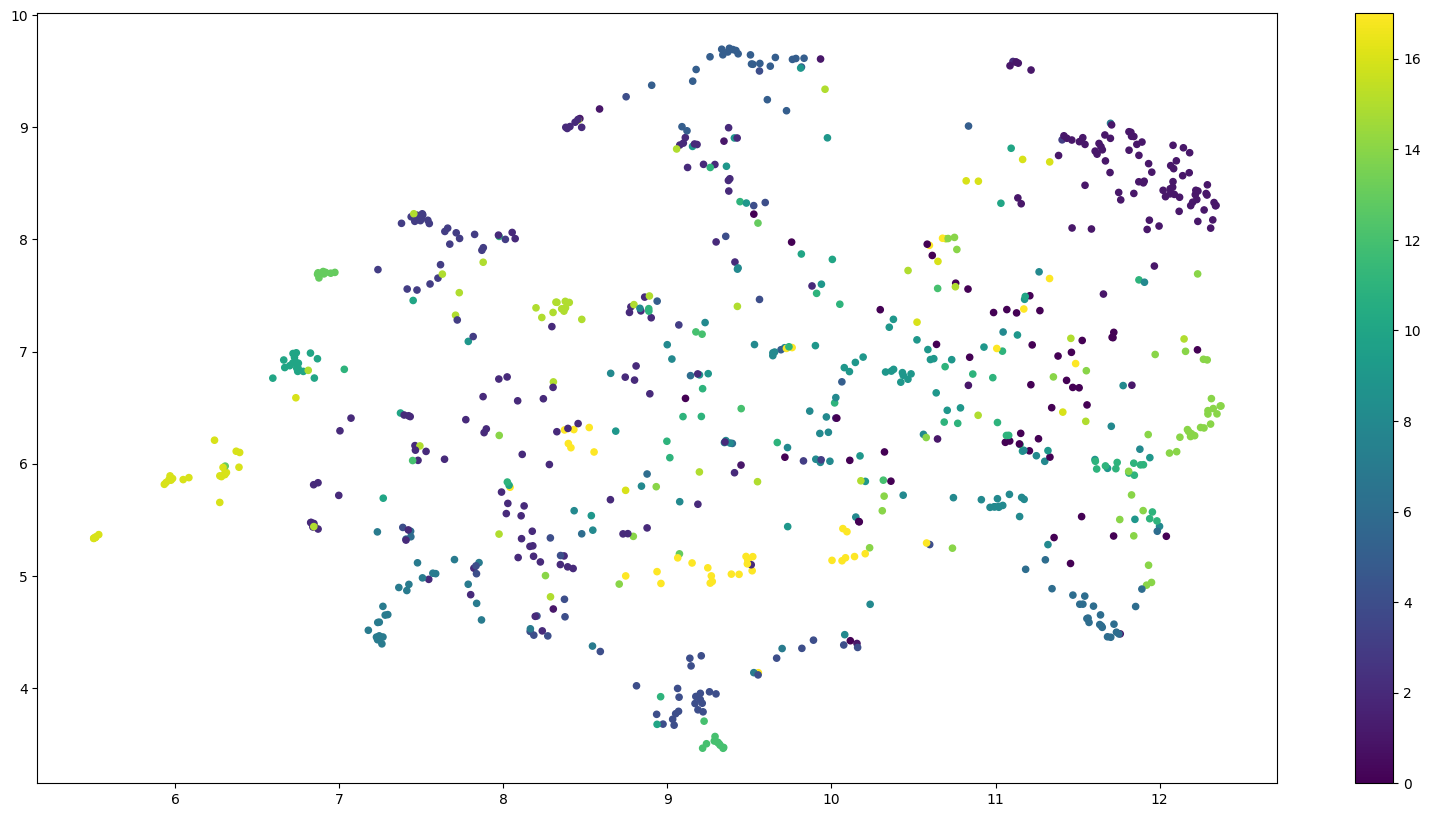

In [32]:
# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(result_NMF.x, result_NMF.y, c=result_NMF.labels, s=20, cmap='viridis')
plt.colorbar()

In [249]:
umap_data_NMF = umap.UMAP(n_neighbors=15, n_components=3, min_dist=0.0, metric='cosine').fit_transform(dtm)

In [250]:
result_NMF = pd.DataFrame(umap_data_NMF, columns=['x', 'y', 'z'])
result_NMF['labels'] = topic_results.argmax(axis=1)

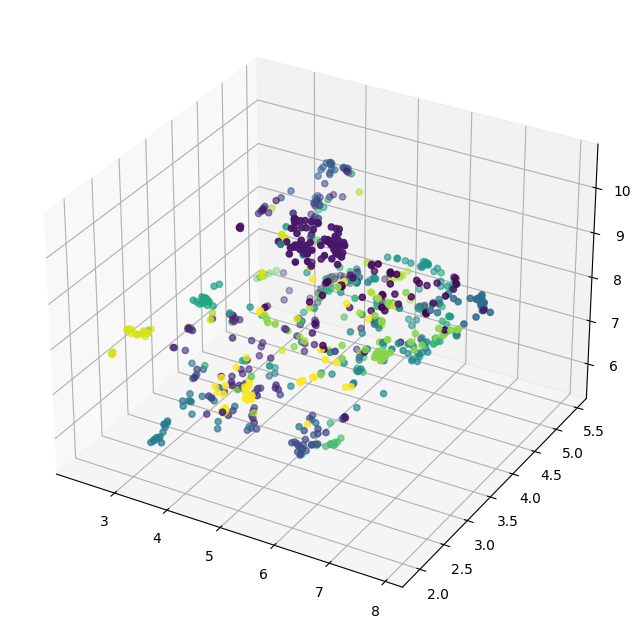

In [417]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(result_NMF.x, result_NMF.y, result_NMF.z, c=result_NMF.labels)
plt.show()

### UMAP HDBSCAN Clustering

In [21]:
model = SentenceTransformer('all-mpnet-base-v2')
embeddings = model.encode(df.Header, show_progress_bar=True)

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

In [22]:
umap_embeddings = umap.UMAP(n_neighbors=50, 
                            n_components=2,
                            min_dist=0,
                            metric='cosine').fit_transform(embeddings)

In [23]:
cluster = hdbscan.HDBSCAN(min_cluster_size=10,
                          metric='manhattan',                      
                          cluster_selection_method='leaf').fit(umap_embeddings)

In [24]:
umap_HDBSCAN = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result_HDBSCAN = pd.DataFrame(umap_HDBSCAN, columns=['x', 'y'])
result_HDBSCAN['labels'] = cluster.labels_

In [51]:
pubmed_data_results['HD_topic'] = cluster.labels_

pubmed_data_results['HD_xcoords'] = result_HDBSCAN.x

pubmed_data_results['HD_ycoords'] = result_HDBSCAN.y

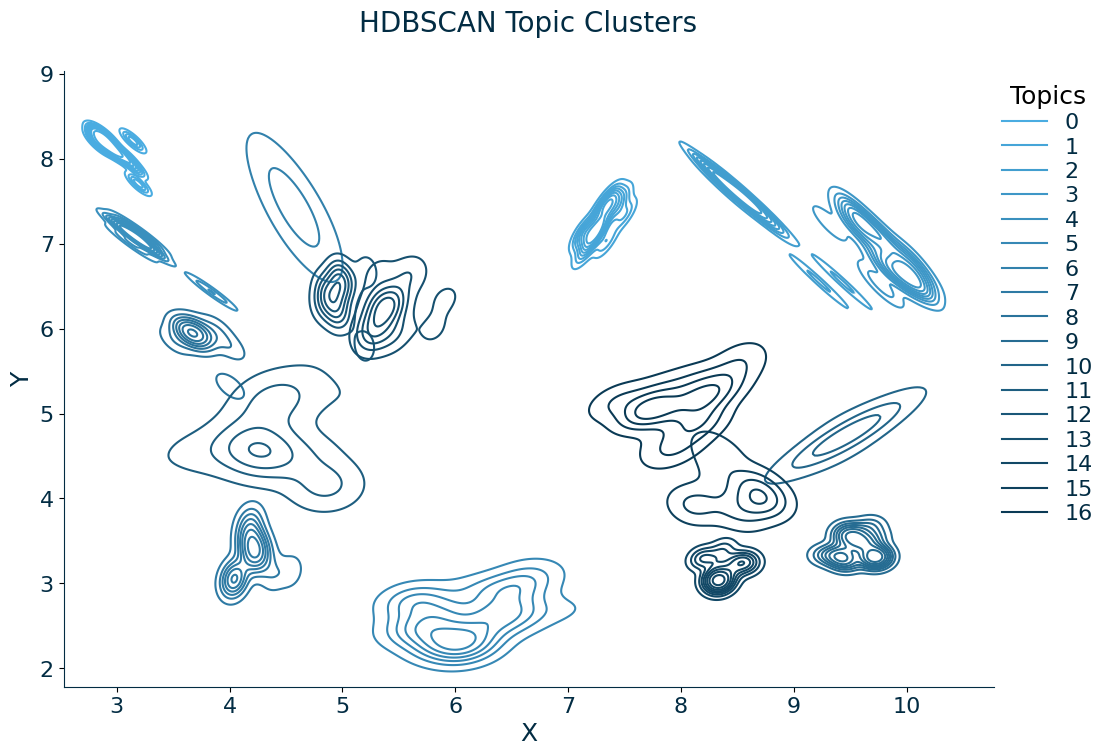

In [25]:
clustered = result_HDBSCAN.loc[result_HDBSCAN.labels != -1, :]

figure, ax = plt.subplots(figsize=(12,8))

ax = sns.kdeplot(x=clustered.x, y=clustered.y, hue=clustered.labels, palette=color)
plt.xlabel('X', size=18, color=c2)
plt.ylabel('Y', size=18, color=c2)
plt.xticks(size=16, color=c2)
plt.yticks(size=16, color=c2)
plt.title('HDBSCAN Topic Clusters', size=20, color=c2, y=1.05)

sns.move_legend(obj=ax, loc=(1,0.25), frameon=False, title='Topics', prop={'size':16}, title_fontproperties={'size':18}, labelspacing=0.2, labelcolor=c2)
sns.despine()
ax.spines['left'].set_color('#022c43')
ax.spines['bottom'].set_color('#022c43')
figure.set_alpha(0)
ax.set_facecolor('#fff')
plt.savefig('HDBSCAN_topic_clusters.png', format='png', dpi=300);

NameError: name 'outlier_loc' is not defined

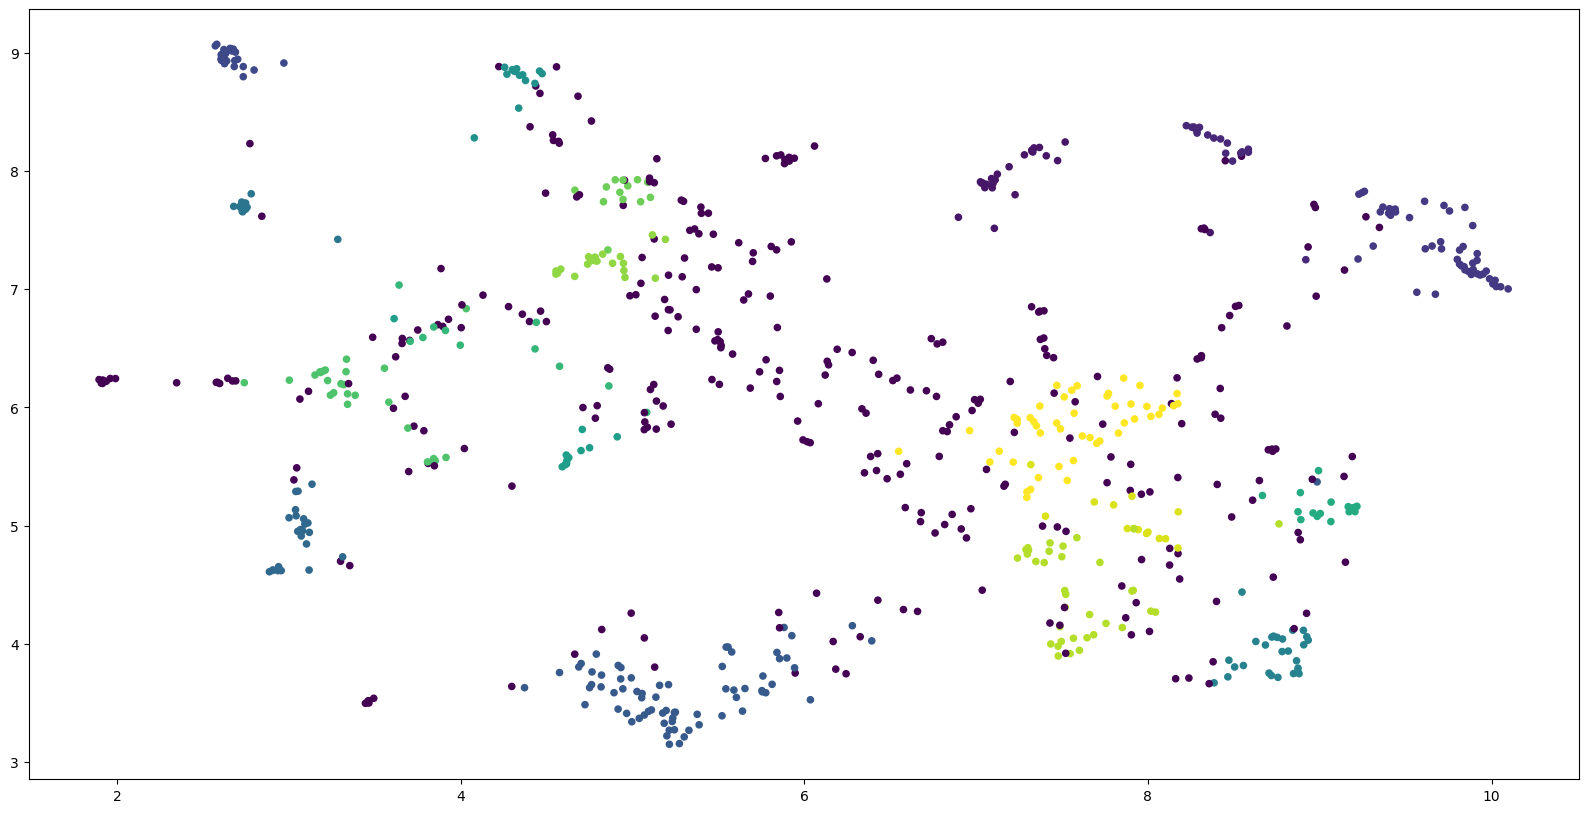

In [53]:
# Visualize clusters
clustered = result_HDBSCAN.loc[result_HDBSCAN.labels == -1, :]

fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(result_HDBSCAN.x, result_HDBSCAN.y, c=result_HDBSCAN.labels, s=20)
plt.scatter(outlier_loc.x, outlier_loc.y, c='#e6e6e6')
plt.colorbar()

#### create a single document for each cluster of documents

In [54]:
data = df.Header

In [55]:
docs_df = pd.DataFrame(data)
docs_df.columns = ['Doc']
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

#### Then, we apply the class-based TF-IDF:

https://www.kdnuggets.com/wp-content/uploads/grootendorst-topic-modeling-bert-2.png![image.png](attachment:image.png)

Where the frequency of each word t is extracted for each class i and divided by the total number of words w. This action can be seen as a form of regularization of frequent words in the class. Next, the total, unjoined, number of documents m is divided by the total frequency of word t across all classes n.

In [56]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)
    return tf_idf, count

tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))


In [57]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

In [58]:
def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                         .Doc
                         .count()
                         .reset_index()
                         .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                         .sort_values("Size", ascending=False))
    return topic_sizes

In [164]:
top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
top_n_words[0]

[('connectivity', 0.027497377125533243),
 ('brainstem', 0.026538569438309973),
 ('hc', 0.023287562633131427),
 ('mri', 0.020769315212590417),
 ('subcortical', 0.018063955358608115),
 ('cortical', 0.016625502041488036),
 ('functional', 0.016436226012035645),
 ('regions', 0.016410666452420508),
 ('imaging', 0.01624873837533152),
 ('abnormal', 0.01611801384277887),
 ('network', 0.016073431924985514),
 ('dti', 0.01590970506926383),
 ('cfsicc', 0.01590970506926383),
 ('volume', 0.01563409201307227),
 ('task', 0.015284885303437638),
 ('volumes', 0.014281517791522823),
 ('fmri', 0.014167511811634568),
 ('brain', 0.014133544594839634),
 ('correlations', 0.013692220364170277),
 ('t1w', 0.013631120593771359)]

In [144]:
joblib.dump(top_n_words, 'HDB_top_words.pkl')

['HDB_top_words.pkl']

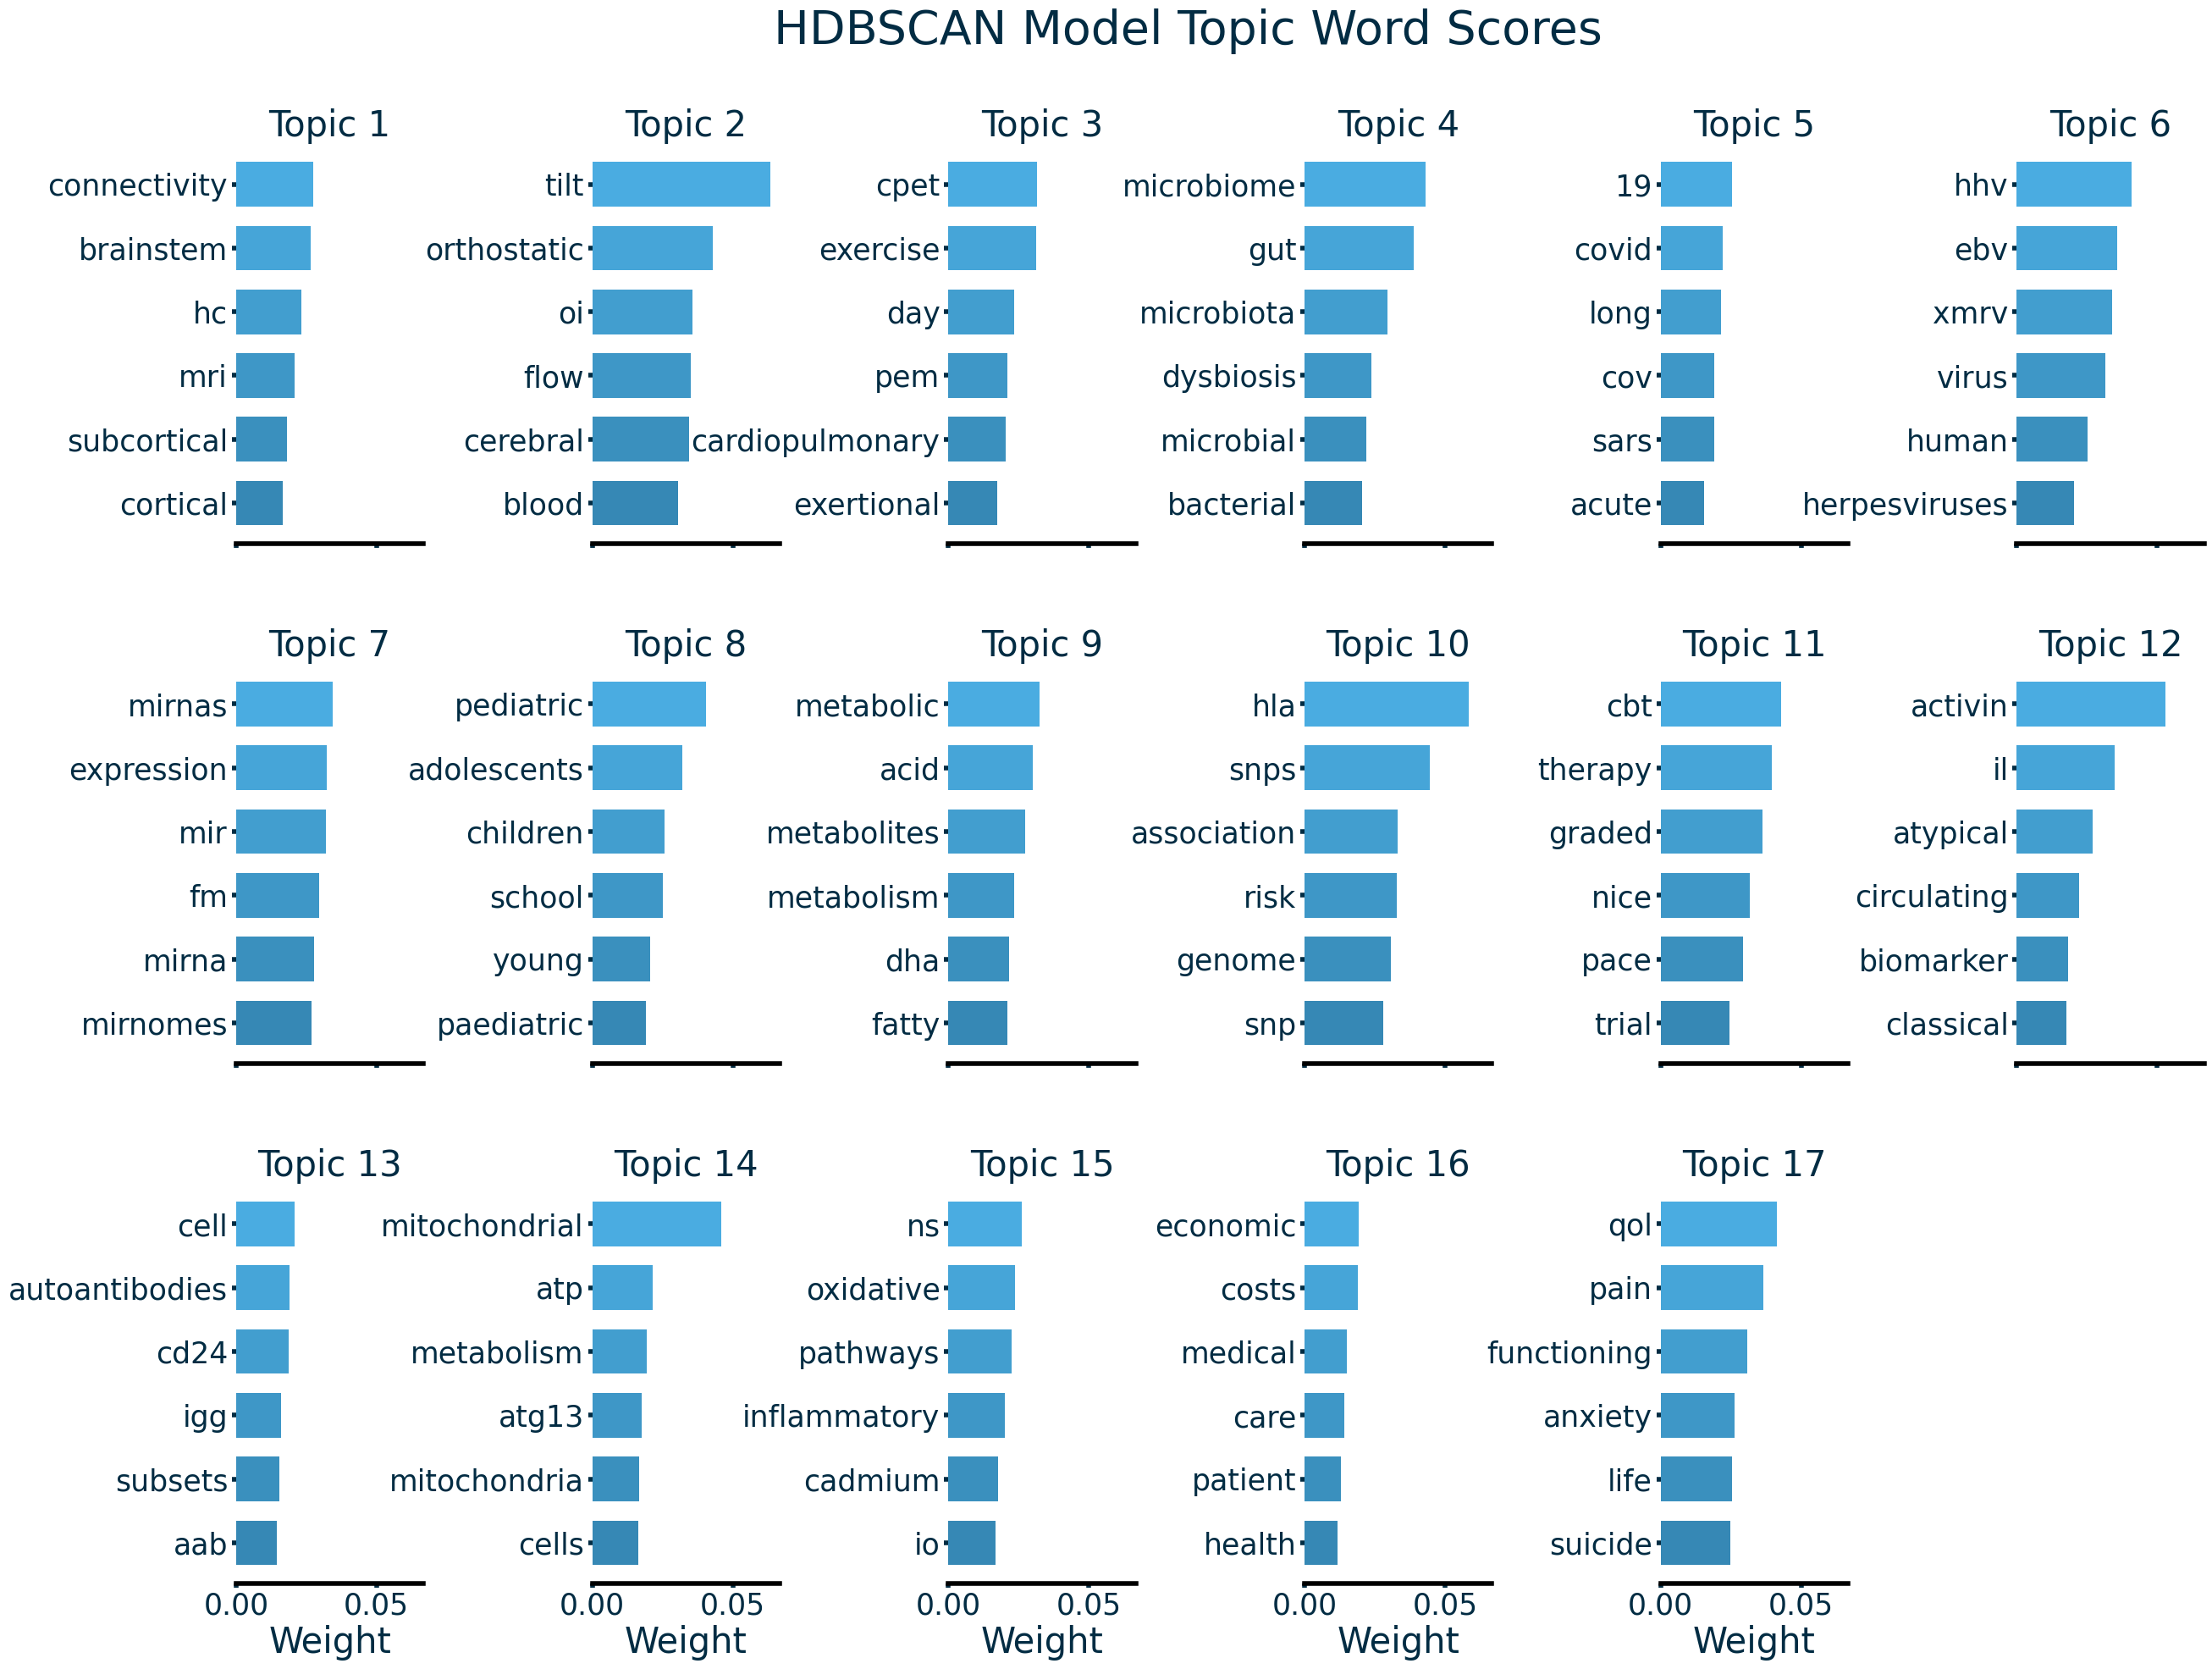

In [60]:
fig, axes = plt.subplots(3, 6, figsize=(30, 20), sharex=True)
axes = axes.flatten()
title = 'HDBSCAN Model Topic Word Scores'

for x in range(17):
    top_features = [y[0] for y in top_n_words[x]]
    weights = [y[1] for y in top_n_words[x]]
    
    ax = axes[x]
    ax.barh(top_features, weights, height=0.7, color=color)
    ax.set_title(f"Topic {x +1}", fontdict={"fontsize": 30}, color=c2)
    ax.invert_yaxis()
    if x > 11: ax.set_xlabel('Weight', fontsize=30, color=c2)
    ax.tick_params(axis="both", which="major", labelsize=25, colors=c2, width=4)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    ax.spines['bottom'].set_linewidth(4)
    fig.suptitle(title, fontsize=40, color=c2)
ax = axes[17]
fig.delaxes(ax)
plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.savefig('Topics_in_HDBSCAN.png', format='png', dpi=300)
        

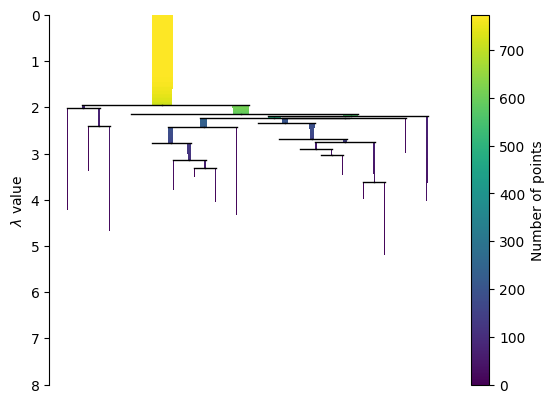

In [61]:
cluster.condensed_tree_.plot()
plt.ylim(8,0);

### BERT

In [26]:
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.2)

In [27]:
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

umap_model = umap.UMAP(n_components=5, n_neighbors=30, min_dist=0.0, metric='cosine', random_state=42)

hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, min_samples = 10, metric='euclidean', prediction_data=True)

sentence_model = SentenceTransformer('all-mpnet-base-v2')

topic_model = BERTopic(representation_model=representation_model, vectorizer_model=vectorizer_model, umap_model=umap_model, hdbscan_model=hdbscan_model, embedding_model=sentence_model)



In [28]:
BERT_data = df.Header

In [29]:
BERT_topics = topic_model.fit_transform(BERT_data)

In [30]:
topic_df = pd.DataFrame(topic_model.get_document_info(BERT_data))

In [161]:
BERT_topic_words = topic_model.fit(BERT_data).topic_representations_

In [163]:
joblib.dump(BERT_topic_words, 'BERT_top_words.pkl')

['BERT_top_words.pkl']

In [31]:
umap_BERT = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.0, metric='cosine', random_state=42).fit_transform(embeddings)
result_BERT = pd.DataFrame(umap_BERT, columns=['x', 'y'])
result_BERT['labels'] = topic_df.Topic

In [70]:
pubmed_data_results['BERT_topic'] = topic_df.Topic

pubmed_data_results['BERT_xcoords'] = result_BERT.x

pubmed_data_results['BERT_ycoords'] = result_BERT.y

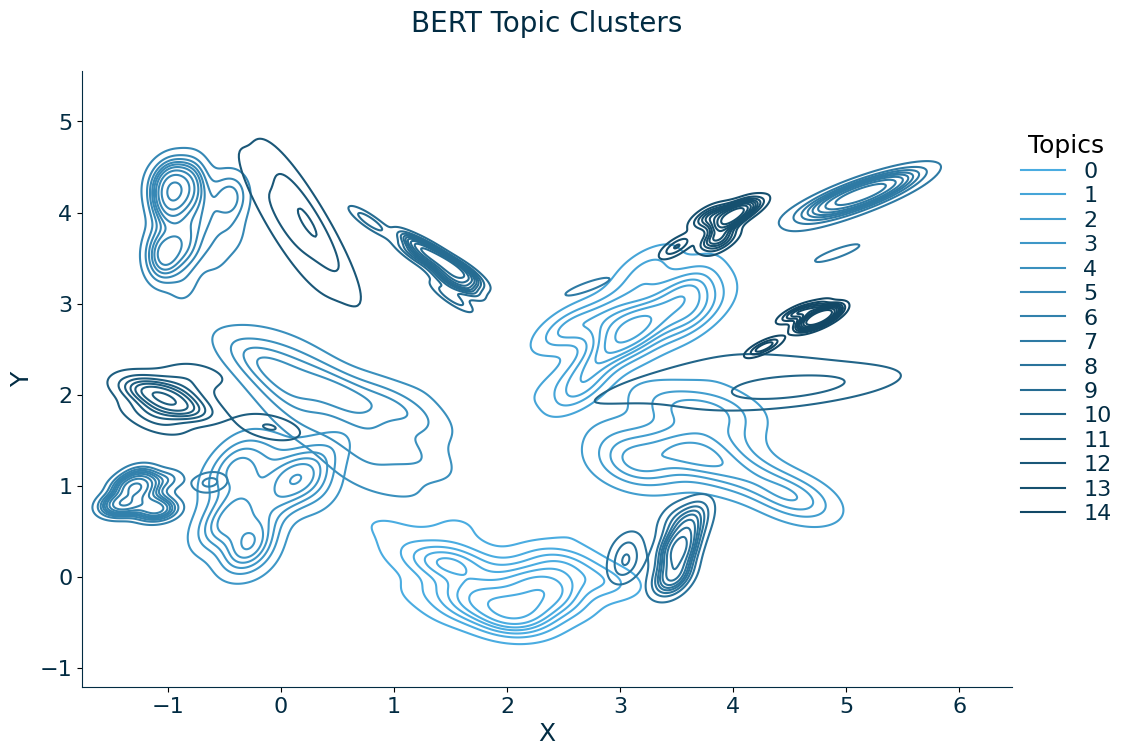

In [33]:
result_BERT = result_BERT.loc[result_BERT.labels != -1, :]

figure, ax = plt.subplots(figsize=(12,8))

ax = sns.kdeplot(x=result_BERT.x, y=result_BERT.y, hue=result_BERT.labels, palette=color)
plt.xlabel('X', size=18, color=c2)
plt.ylabel('Y', size=18, color=c2)
plt.xticks(size=16, color=c2)
plt.yticks(size=16, color=c2)
plt.title('BERT Topic Clusters', size=20, color=c2, y=1.05)

sns.move_legend(obj=ax, loc=(1,0.25), frameon=False, title='Topics', prop={'size':16}, title_fontproperties={'size':18}, labelspacing=0.2, labelcolor=c2)
sns.despine()
ax.spines['left'].set_color('#022c43')
ax.spines['bottom'].set_color('#022c43')
figure.set_alpha(0)
ax.set_facecolor('#fff')
plt.savefig('BERT_topic_clusters.png', format='png', dpi=300);

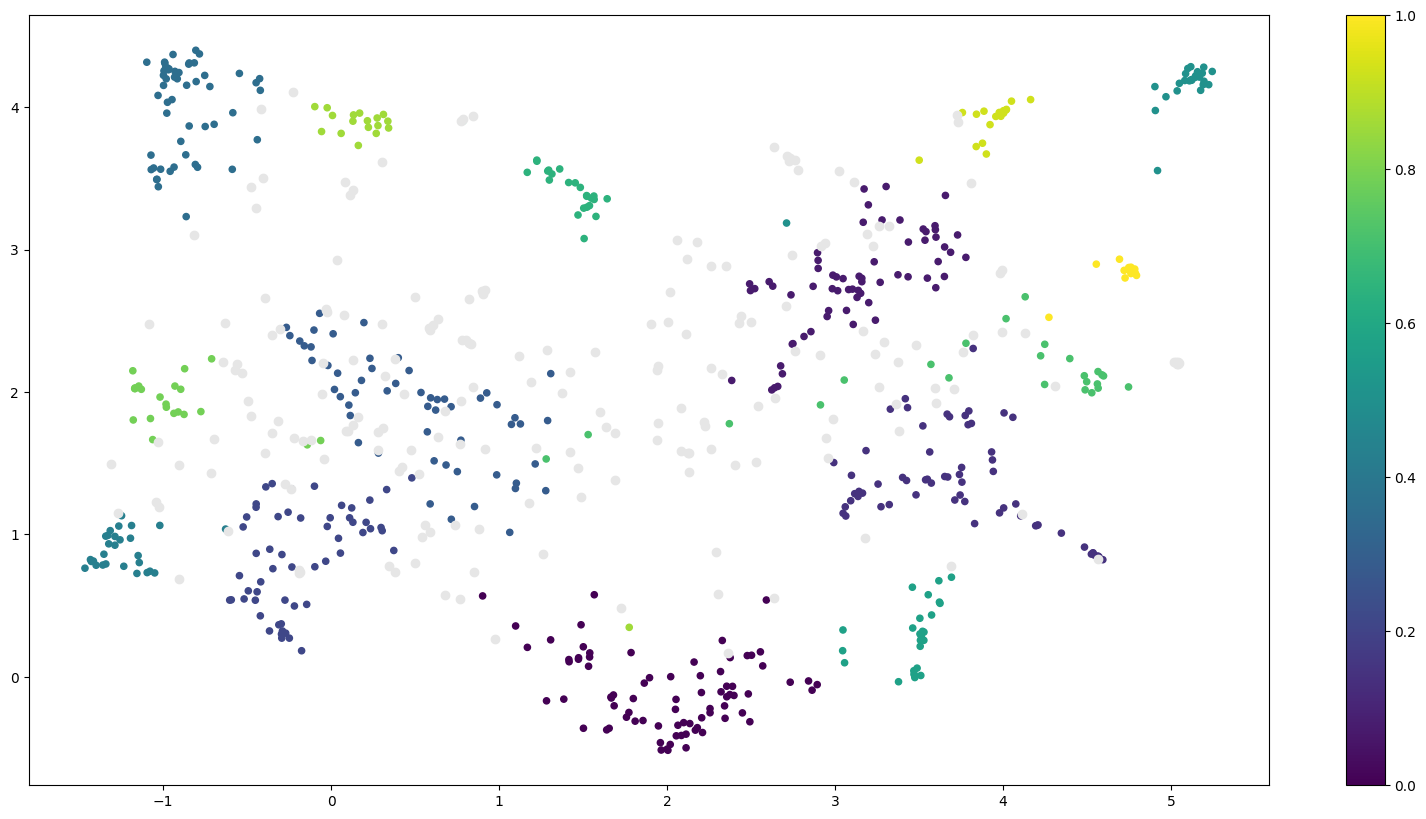

In [69]:
outlier = result_BERT[result_BERT.labels == -1]
clustered = result_BERT[result_BERT.labels != -1]
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=20, cmap='viridis')
plt.scatter(outlier.x, outlier.y, c='#e6e6e6')
plt.colorbar()

In [131]:
topic_term_matrix = topic_model.c_tf_idf_
words = topic_model.vectorizer_model.get_feature_names_out()

NotFittedError: Vocabulary not fitted or provided

In [151]:
feature_names = tfid.get_feature_names_out()
BERT_top_words = {}
n_top_words = 20

for topic_idx, topic in enumerate(topic_model.topic_representations_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]
    
    topics = [(top_features[i], weights[i]) for i in range(len(top_features))]
    
    BERT_top_words[topic_idx] = topics

TypeError: 'NoneType' object is not iterable

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (20,) and arg 3 with shape (10,).

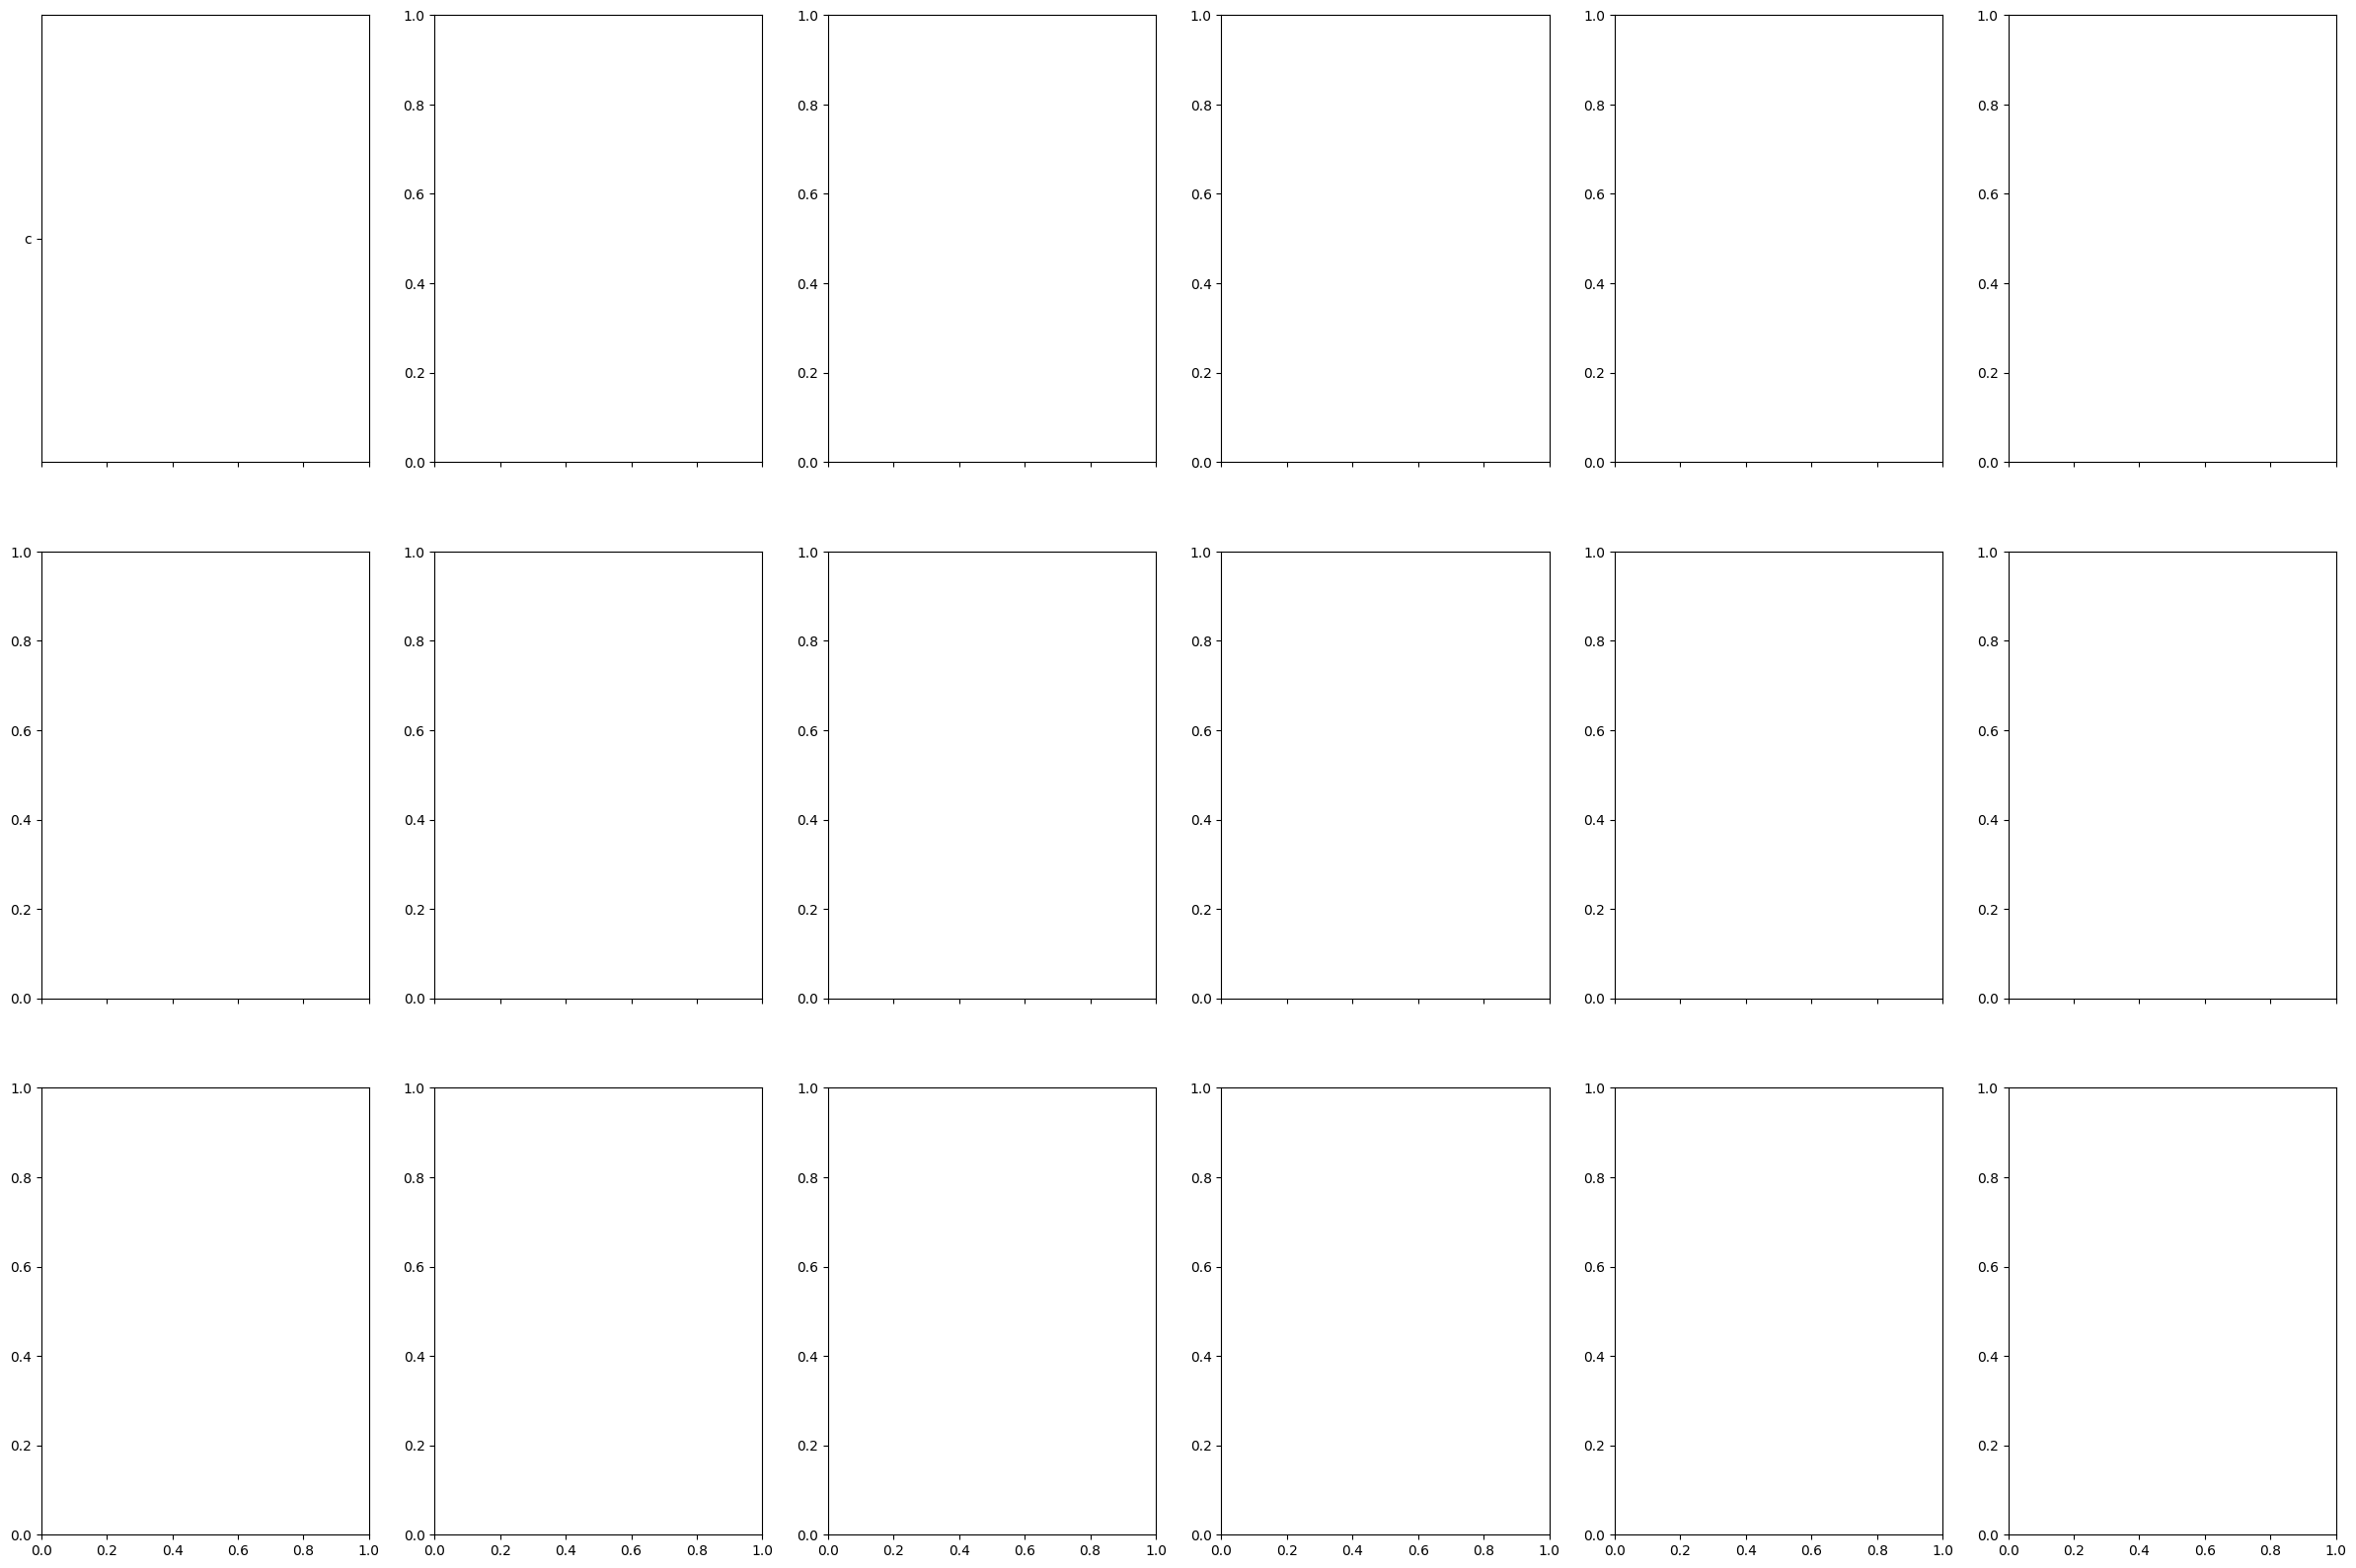

In [145]:
fig, axes = plt.subplots(3, 6, figsize=(30, 20), sharex=True)
axes = axes.flatten()
title = 'BERT Model Topic Word Scores'

for x in range(17):
    top_features = [y[0] for y in topic_df.Top_n_words.str.split(' - ')[x]]
    weights = [y[1] for y in top_n_words[x]]
    
    ax = axes[x]
    ax.barh(top_features, weights, height=0.7, color=color)
    ax.set_title(f"Topic {x +1}", fontdict={"fontsize": 30}, color=c2)
    ax.invert_yaxis()
    if x > 11: ax.set_xlabel('Weight', fontsize=30, color=c2)
    ax.tick_params(axis="both", which="major", labelsize=25, colors=c2, width=4)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    ax.spines['bottom'].set_linewidth(4)
    fig.suptitle(title, fontsize=40, color=c2)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)


In [19]:
pubmed_data_results = df

In [20]:
df.columns

Index(['Year', 'Author', 'Title', 'Abstract', 'Header', 'GPT', 'ada_embedding',
       'Cluster', 'Topic', 'Topic_summary', 'Topic2', 'Topic_summary2',
       'HDBSCAN_label', 'BERT_topic'],
      dtype='object')

In [72]:
pubmed_data_results = pubmed_data_results.drop(['Header', 'GPT', 'ada_embedding', 'Cluster', 'Topic', 'Topic_summary', 'Topic2', 'Topic_summary2'], axis=1)

In [74]:
pubmed_data_results = pubmed_data_results.drop(['HDBSCAN_label'], axis=1)

In [76]:
pubmed_data_results.to_csv('pubmed_data_results.csv', index=False)

In [78]:
NMF_plot_data = result_NMF.groupby('labels').agg({'x':['mean','count'], 'y':['mean', 'count']})

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [81]:
y_scaled = np.array(NMF_plot_data.y['mean'])
y_scaled = y_scaled.reshape(-1,1)
y_scaled = scaler.fit_transform(y_scaled)
y_scaled = (y_scaled * 2) - 1

x_scaled = np.array(NMF_plot_data.x['mean'])
x_scaled = x_scaled.reshape(-1,1)
x_scaled = scaler.fit_transform(x_scaled)
x_scaled = (x_scaled * 2) - 1

NMF_data = pd.DataFrame(NMF_plot_data.x['count'])
NMF_data.columns = ['Count']
NMF_data['X'] = x_scaled
NMF_data['Y'] = y_scaled
NMF_data

,Count,X,Y
labels,,,
0,49,0.705826,-0.143227
1,92,1.000000,0.630533
2,101,-0.467464,-0.131826
3,32,-0.657395,0.384502
4,46,-0.157152,-0.921182
5,29,0.056645,1.000000
6,30,0.649204,-0.862304
7,32,-0.731495,-0.921508
8,58,0.392560,-0.321431


In [82]:
NMF_data.to_csv('NMF_mean_data.csv', index=False)

In [83]:
HD_plot_data = result_HDBSCAN.groupby('labels').agg({'x':['mean','count'], 'y':['mean', 'count']})

In [84]:
y_scaled = np.array(HD_plot_data.y['mean'])
y_scaled = y_scaled.reshape(-1,1)
y_scaled = scaler.fit_transform(y_scaled)
y_scaled = (y_scaled * 2) - 1

x_scaled = np.array(HD_plot_data.x['mean'])
x_scaled = x_scaled.reshape(-1,1)
x_scaled = scaler.fit_transform(x_scaled)
x_scaled = (x_scaled * 2) - 1

HD_data = pd.DataFrame(HD_plot_data.x['count'])
HD_data.columns = ['Count']
HD_data['X'] = x_scaled
HD_data['Y'] = y_scaled
HD_data

,Count,X,Y
labels,,,
-1,313,-0.059194,-0.061617
0,24,0.301948,0.622403
1,18,0.637291,0.716243
2,49,1.000000,0.401980
3,26,-1.000000,1.000000
4,71,-0.240479,-1.000000
5,24,-0.891474,-0.516922
6,12,-0.967259,0.518438
7,27,0.725813,-0.889250


In [87]:
HD_data.to_csv('HDBSCAN_mean_data.csv', index=False)

In [85]:
BT_plot_data = result_BERT.groupby('labels').agg({'x':['mean','count'], 'y':['mean', 'count']})

In [86]:
y_scaled = np.array(BT_plot_data.y['mean'])
y_scaled = y_scaled.reshape(-1,1)
y_scaled = scaler.fit_transform(y_scaled)
y_scaled = (y_scaled * 2) - 1

x_scaled = np.array(BT_plot_data.x['mean'])
x_scaled = x_scaled.reshape(-1,1)
x_scaled = scaler.fit_transform(x_scaled)
x_scaled = (x_scaled * 2) - 1

BT_data = pd.DataFrame(BT_plot_data.x['count'])
BT_data.columns = ['Count']
BT_data['X'] = x_scaled
BT_data['Y'] = y_scaled
BT_data

,Count,X,Y
labels,,,
-1,204,-0.137455,0.043556
0,79,0.035249,-1.000000
1,65,0.394275,0.360915
2,62,0.588909,-0.307481
3,56,-0.660928,-0.553436
4,55,-0.444202,-0.056950
5,53,-0.880005,0.939360
6,28,-1.000000,-0.530574
7,27,1.000000,1.000000


In [88]:
BT_data.to_csv('BERT_mean_data.csv', index=False)